# Contextual based neural lemmatization with Flair

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/LAP/Subjects/AP1/labs

/content/drive/MyDrive/LAP/Subjects/AP1/labs


In [2]:
pip install --upgrade flair

     |████████████████████████████████| 322 kB 5.3 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.5 MB 40.4 MB/s 
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 981 kB 40.1 MB/s 
     |████████████████████████████████| 788 kB 34.8 MB/s 
     |████████████████████████████████| 1.2 MB 36.6 MB/s 
     |████████████████████████████████| 19.7 MB 7.5 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.8 MB 25.4 MB/s 
     |████████████████████████████████| 895 kB 42.0 MB/s 
     |████████████████████████████████| 596 kB 43.2 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9692 sha256=c7ecdd26712a557ad64b56dc4562d7be5922470772c4a1

In [3]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, CharacterEmbeddings
from typing import List

# ASSIGNMENT 1

Please inspect the data we provided (train, dev and test sets available): 'content/drive/My Drive/Colab Notebooks/2022-ILTAPP/datasets/sigmorphon2019/'

+ TODO Try to spot the differences with the Lab 04-ner-training-tagging_TODO.ipynb.
+ TODO: define the columns required to instantiate the ColumnCorpus and the tag we want to predict.
+ TODO: use downsampling to speed up training.
+ TODO: print the total number of tags to predict in the corpus and check how this changes as you change the downsampling.
+ TODO: experiment with Classic Embeddings, CharacterEmbeddings and Flair Embeddings for improving accuracy performance (also with number of epochs).
  + HINT: Do not combine more than two types of embeddings to avoid running out RAM.

In [8]:
# TODO define columns
columns = {0:'text', 1:'pos', 2:'rule'}

# TODO get the corpus
corpus = ColumnCorpus(data_folder='../datasets/sigmorphon2019', train_file='eu-train.tsv', 
                      dev_file='eu-dev.tsv', test_file='eu-test.tsv', column_format=columns)
corpus = corpus.downsample(0.3)

# obtain and print corpus statistics
print(corpus.obtain_statistics())

2022-02-25 20:56:11,337 Reading data from ../datasets/sigmorphon2019
2022-02-25 20:56:11,341 Train: ../datasets/sigmorphon2019/eu-train.tsv
2022-02-25 20:56:11,343 Dev: ../datasets/sigmorphon2019/eu-dev.tsv
2022-02-25 20:56:11,345 Test: ../datasets/sigmorphon2019/eu-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 2158,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 29695,
            "min": 3,
            "max": 64,
            "avg": 13.760426320667284
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 270,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 3495,
            "min": 3,
            "max": 36,
            "avg": 12.944444444444445
        }
    },
    "DEV": {
        "dataset": "DEV",
        "total_number_of_docu

In [12]:
# TODO what tag do we want to predict?
tag_type = 'rule'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(tag_dictionary.idx2item[:10])

# TODO print total number of tags
print(len(tag_dictionary))

2022-02-25 20:58:30,444 Computing label dictionary. Progress:


100%|██████████| 2158/2158 [00:00<00:00, 11722.88it/s]

2022-02-25 20:58:30,639 Corpus contains the labels: pos (#29695), rule (#29695)
2022-02-25 20:58:30,640 Created (for label 'rule') Dictionary with 731 tags: <unk>, ↓0;d¦+, ↓0;d¦-+k+, ↓0;d¦----+u+, ↓0;d¦-+, ↓0;d¦---+u+, ↓0;d¦--+, ↓0;d+*+e¦--→+n+, ↓0;d--+*¦+d+u→+, ↑0¦↓1;d¦+, ↑0¦↓1;d¦--+, ↓0;d¦+h→-+, ↓0;d¦----+, ↓0;d¦-------+, ↓0;d+*+e¦-+n+, ↓0;d¦------+, ↓0;d+*+e¦+n+, ↓0;d¦---+, ↓0;d-¦-→+, ↓0;d¦-→-+, ↓0;d--+*+e+d¦+n+, ↓0;d¦--→+, ↓0;d--+*¦+d+u→---+, ↓0;d¦+++!→→+, ↓0;d----+*¦+d+u→+, ↓0;d-¦+d→-→--+i+, ↓0;d---+i+z¦+n+, ↑0¦↓1;d¦---+, ↓0;d¦-----+, ↓0;d¦----→+, ↓0;d¦+t+u+, ↓0;d----+*¦---+d+i+n+, ↓0;d---+*¦+d+u+n+, ↓0;d----¦+g+o+n+, ↑0¦↓1;d¦-+, ↑0¦↓-1;d¦--+, ↑0¦↓1;d¦--+a+, ↓0;d+i¦-+a→+, ↓0;d¦--------+, ↓0;d-+i+z¦+n+, ↓0;d¦----+i+, ↓0;d+*+e¦---+n+, ↓0;d+*+e¦---→+n+, ↓0;d¦+d+u+, ↑0¦↓-1;d¦-+, ↓0;d---+*¦+d+u→+, ↓0;d------+*¦+d+u→+, ↓0;d---¦+k+a+n+, ↓0;d--+e¦---+n+, ↓0;d¦---+i+
[b'<unk>', b'\xe2\x86\x930;d\xc2\xa6+', b'\xe2\x86\x930;d\xc2\xa6-+k+', b'\xe2\x86\x930;d\xc2\xa6----+u+', b'\xe2\x86\x930;d

In [13]:
# TODO play with embeddings and check performance; which one is the best combination?
embedding_types: List[TokenEmbeddings] = [

    #CharacterEmbeddings(),
    WordEmbeddings('eu'),
    FlairEmbeddings('eu-forward', chars_per_chunk=128),
    FlairEmbeddings('eu-backward', chars_per_chunk=128),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

2022-02-25 20:59:30,355 https://flair.informatik.hu-berlin.de/resources/embeddings/token/eu-wiki-fasttext-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpw19ub8m5


100%|██████████| 283358528/283358528 [00:13<00:00, 21060291.12B/s]

2022-02-25 20:59:44,197 copying /tmp/tmpw19ub8m5 to cache at /root/.flair/embeddings/eu-wiki-fasttext-300d-1M.vectors.npy


2022-02-25 20:59:44,720 removing temp file /tmp/tmpw19ub8m5
2022-02-25 20:59:45,431 https://flair.informatik.hu-berlin.de/resources/embeddings/token/eu-wiki-fasttext-300d-1M not found in cache, downloading to /tmp/tmpjf1o_7nx


100%|██████████| 9342871/9342871 [00:01<00:00, 7625016.12B/s] 

2022-02-25 20:59:47,051 copying /tmp/tmpjf1o_7nx to cache at /root/.flair/embeddings/eu-wiki-fasttext-300d-1M
2022-02-25 20:59:47,068 removing temp file /tmp/tmpjf1o_7nx


2022-02-25 20:59:49,928 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-eu-opus-large-forward-v0.2.pt not found in cache, downloading to /tmp/tmpxfllggap


100%|██████████| 109092471/109092471 [00:06<00:00, 18096631.26B/s]

2022-02-25 20:59:56,362 copying /tmp/tmpxfllggap to cache at /root/.flair/embeddings/lm-eu-opus-large-forward-v0.2.pt


2022-02-25 20:59:56,632 removing temp file /tmp/tmpxfllggap
2022-02-25 21:00:09,163 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-eu-opus-large-backward-v0.2.pt not found in cache, downloading to /tmp/tmpcyvfkeer


100%|██████████| 109092471/109092471 [00:05<00:00, 19014047.49B/s]

2022-02-25 21:00:15,588 copying /tmp/tmpcyvfkeer to cache at /root/.flair/embeddings/lm-eu-opus-large-backward-v0.2.pt


2022-02-25 21:00:15,811 removing temp file /tmp/tmpcyvfkeer


In [14]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type
)

In [15]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)

In [16]:
trainer.train('../resources/flair-lemma-eu', mini_batch_size=16, train_with_dev=False, max_epochs=20)

2022-02-25 21:01:35,701 ----------------------------------------------------------------------------------------------------
2022-02-25 21:01:35,706 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'eu'
      (embedding): Embedding(236133, 300)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(4488, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=4488, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(4488, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=4488, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4396, out_features=4396, bi

{'dev_loss_history': [tensor(1.7581, device='cuda:0'),
  tensor(1.2262, device='cuda:0'),
  tensor(1.0568, device='cuda:0'),
  tensor(0.8985, device='cuda:0'),
  tensor(0.8597, device='cuda:0'),
  tensor(0.7751, device='cuda:0'),
  tensor(0.7127, device='cuda:0'),
  tensor(0.6744, device='cuda:0'),
  tensor(0.6585, device='cuda:0'),
  tensor(0.6349, device='cuda:0'),
  tensor(0.5995, device='cuda:0'),
  tensor(0.5788, device='cuda:0'),
  tensor(0.5643, device='cuda:0'),
  tensor(0.5395, device='cuda:0'),
  tensor(0.5435, device='cuda:0'),
  tensor(0.5183, device='cuda:0'),
  tensor(0.5114, device='cuda:0'),
  tensor(0.4934, device='cuda:0'),
  tensor(0.4955, device='cuda:0'),
  tensor(0.4877, device='cuda:0')],
 'dev_score_history': [0.6510231923601637,
  0.7609822646657572,
  0.7814461118690313,
  0.8106412005457027,
  0.8169167803547067,
  0.8371077762619372,
  0.8422919508867666,
  0.8521145975443384,
  0.8583901773533424,
  0.8608458390177354,
  0.8725784447476125,
  0.869849931787

2022-02-25 21:26:48,299 ----------------------------------------------------------------------------------------------------
2022-02-25 21:26:48,301 WARNING: No LOSS found for test split in this data.
2022-02-25 21:26:48,302 Are you sure you want to plot LOSS and not another value?
2022-02-25 21:26:48,307 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in ../resources/flair-lemma-eu/training.png


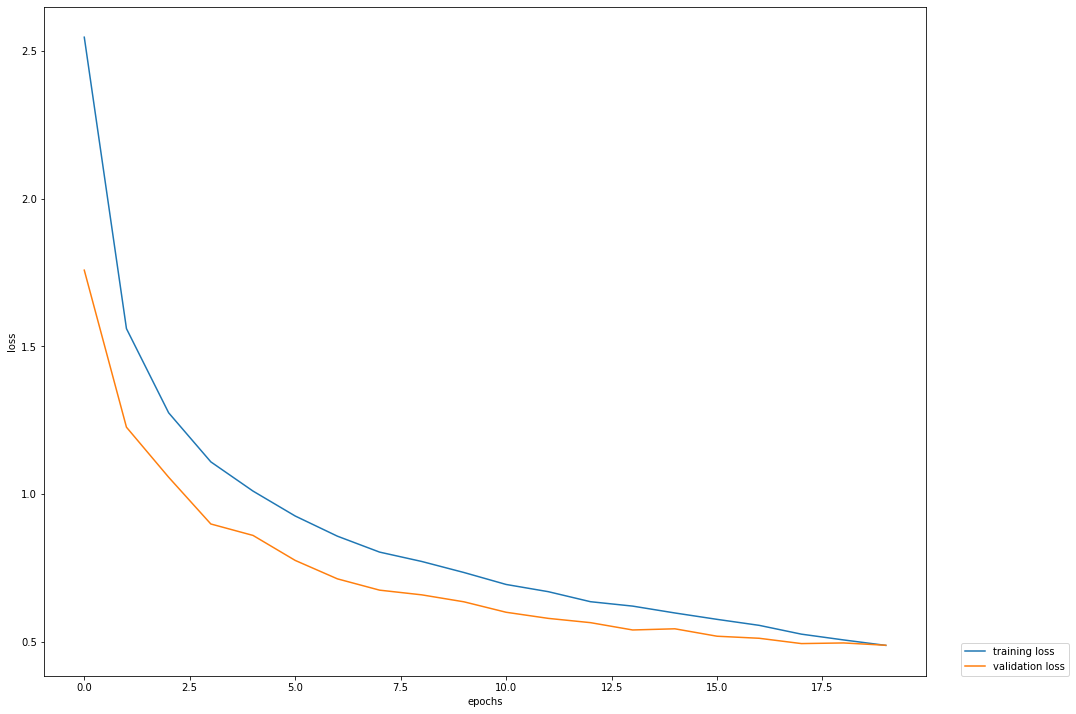

In [17]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('../resources/flair-lemma-eu/loss.tsv', plot_values=["loss"])

# ASSIGNMENT 2

In this assignment we will be using the trained model in the previous step to tag some texts.

**NOTE**: If you use the Basque corpus, you can get a document to process in Basque from a newspaper: https://www.berria.eus/

+ TODO: Pick a document of your choice and run the following Flair components:
  + Tokenize and segment the document into sentences.
  + Instiantiate a SequenceTagger with the generated lemmatizer model.
  + Lemmatize the sentences and print the results (ideally saving the predictions into a list of Sentence objects).

In [20]:
!pip install syntok

In [21]:
# TODO add your code here
from flair.data import Sentence
from flair.models import SequenceTagger
from syntok.tokenizer import Tokenizer
import syntok.segmenter as segmenter

def get_sentences(filename):
    with open(filename) as f:
        document = f.read()

    sentences = []
    for paragraph in segmenter.analyze(document):
        for sentence in paragraph:
            tokens = [token.value for token in sentence]
            text = ' '.join(tokens)
            sent = Sentence(text)
            sentences.append(sent)
    return sentences

In [22]:
eu_sentences = get_sentences('../resources/berria.txt')
ruleTagger = SequenceTagger.load('../resources/flair-lemma-eu/final-model.pt')
ruleTagger.predict(eu_sentences)
for sentence in eu_sentences:
    print(sentence.to_tagged_string())

2022-02-25 21:52:07,767 loading file ../resources/flair-lemma-eu/final-model.pt
Jeroen <↑0¦↓1;d¦+> Dijsselbloem <↑0¦↓1;d¦+> Eurotaldeko <↑0¦↓1;d¦--+> presidentearekin <↓0;d¦------+> egin <↓0;d¦+> du <↓0;d+*+e¦+n+> bilera <↓0;d¦+> Varufakisek <↑0¦↓1;d¦--+> , <↓0;d¦+> eta <↓0;d¦+> haren <↓0;d¦-+u→--+a+> aurrean <↓0;d¦--+> nabarmendu <↓0;d¦+> du <↓0;d+*+e¦+n+> Greziako <↑0¦↓1;d¦--+> Gobernua <↓0;d¦-+> " <↓0;d¦+> egungo <↓0;d¦+> erreskate <↓0;d¦+> plana <↓0;d¦-+> onartzen <↓0;d¦---+u+> ez <↓0;d¦+> duen <↓0;d+*+e¦-→+> programa <↓0;d¦+> batengatik <↓0;d¦------+> " <↓0;d¦+> aukeratu <↓0;d¦+> zutela <↓0;d---+*¦--+d+u+n+> herritarrek <↓0;d¦---+> . <↓0;d¦+>
Hala <↓0;d¦+> ere <↓0;d¦+> , <↓0;d¦+> azaldu <↓0;d¦+> du <↓0;d+*+e¦+n+> gobernuaren <↓0;d¦----+> asmoa <↓0;d¦-+> da <↓0;d-+i+z¦+n+> Europako <↑0¦↓1;d¦--+> kidekin <↓0;d¦----+> elkarlanean <↓0;d¦---+> aritzea <↓0;d¦---+u+> dela <↓0;d---+i+z¦+n+> . <↓0;d¦+>
" <↓0;d¦+> Saiatuko <↓0;d¦--+> gara <↓0;d-+i+z¦--+n+> gure <↓0;d¦--+> kideak <↓0;d¦--+> 

# ASSIGNMENT 3

As you can see in the previous step, the model we trained predicts this weird lemma_rules based on the minimum script edits generated by the get_ses_affixes.py script (in the resources folder). In order to obtain the real lemma we need to decode the lemma_rule using the function _apply_lemma_rule(form, lemma_rule) below.

+ This function takes as parameters the original word we want to lemmatize and the lemma_rule predicted by our lemmatizer model.

  ```
  decoded_lemma = _apply_lemma_rule('partidua', '↓0;d¦-+')
  print(decoded_lemma)
  'partidu'
  ```
Ideally you may have saved the previous predictions in a list of Sentence objects. Being that the case, you need to:

+ TODO: Iterate over the sentences to extract the lemma prediction (or lemma_rule) which will be used, together with the word, as input to obtain the decoded lemma.
+ TODO: print the results with the decoded lemma.
 

In [23]:
def _apply_lemma_rule(form, lemma_rule):
    if ';' not in lemma_rule:
        raise ValueError('lemma_rule %r for form %r missing semicolon' % (lemma_rule, form))
    casing, rule = lemma_rule.split(";", 1)
    if rule.startswith("a"):
        lemma = rule[1:]
    else:
        form = form.lower()
        rules, rule_sources = rule[1:].split("¦"), []
        assert len(rules) == 2
        for rule in rules:
            source, i = 0, 0
            while i < len(rule):
                if rule[i] == "→" or rule[i] == "-":
                    source += 1
                else:
                    assert rule[i] == "+"
                    i += 1
                i += 1
            rule_sources.append(source)

        try:
            lemma, form_offset = "", 0
            for i in range(2):
                j, offset = 0, (0 if i == 0 else len(form) - rule_sources[1])
                while j < len(rules[i]):
                    if rules[i][j] == "→":
                        lemma += form[offset]
                        offset += 1
                    elif rules[i][j] == "-":
                        offset += 1
                    else:
                        assert (rules[i][j] == "+")
                        lemma += rules[i][j + 1]
                        j += 1
                    j += 1
                    # print(lemma)
                if i == 0:
                    lemma += form[rule_sources[0]: len(form) - rule_sources[1]]
        except:
            lemma = lemma

    for rule in casing.split("¦"):
        if rule == "↓0": continue  # The lemma is lowercased initially
        if not rule: continue  # Empty lemma might generate empty casing rule
        case, offset = rule[0], int(rule[1:])
        lemma = lemma[:offset] + (lemma[offset:].upper() if case == "↑" else lemma[offset:].lower())
    return lemma

In [24]:
# TODO add your code here
def decode_lemmas(sentences):
    for sentence in sentences:
        for token in sentence:
            form = token.text
            lemma_rule = token.get_tag('rule').value
            print(form, "\t", _apply_lemma_rule(form, lemma_rule))

decode_lemmas(eu_sentences)

Jeroen 	 Jeroen
Dijsselbloem 	 Dijsselbloem
Eurotaldeko 	 Eurotalde
presidentearekin 	 presidente
egin 	 egin
du 	 *edun
bilera 	 bilera
Varufakisek 	 Varufakis
, 	 ,
eta 	 eta
haren 	 hura
aurrean 	 aurre
nabarmendu 	 nabarmendu
du 	 *edun
Greziako 	 Grezia
Gobernua 	 gobernu
" 	 "
egungo 	 egungo
erreskate 	 erreskate
plana 	 plan
onartzen 	 onartu
ez 	 ez
duen 	 *edun
programa 	 programa
batengatik 	 bate
" 	 "
aukeratu 	 aukeratu
zutela 	 *edun
herritarrek 	 herritar
. 	 .
Hala 	 hala
ere 	 ere
, 	 ,
azaldu 	 azaldu
du 	 *edun
gobernuaren 	 gobernu
asmoa 	 asmo
da 	 izan
Europako 	 Europa
kidekin 	 kid
elkarlanean 	 elkarlan
aritzea 	 aritu
dela 	 izan
. 	 .
" 	 "
Saiatuko 	 saiatu
gara 	 izan
gure 	 gu
kideak 	 kide
konbentzitzen 	 konbentzitu
irtenbide 	 irtenbide
bat 	 bat
topatu 	 topatu
behar 	 behar
dugula 	 *edugn
Europako 	 Europa
interes 	 interes
komunen 	 komun
alde 	 alde
" 	 "
, 	 ,
esan 	 esan
du 	 *edun
Varufakisek 	 Varufakis
. 	 .
Dijsselbloemek 	 Dijsselbloeme
, 	

# BONUS ASSIGNMENT 4 

+ TODO Obtain manually the distance between two strings using the Levenshtein distance algorithm we presented in class for the following two words:

````
mellifluous -> mellow
````

You can write the matrix here using markdown.

In [57]:
import numpy as np
# char s[1..m], char t[1..n]
def levenshtein_distance(s, t):
    # for all i and j, d[i,j] will hold the Levenshtein distance between
    # the first i characters of s and the first j characters of t
    m = len(s)
    n = len(t)
    # set each element in d to zero
    d = np.zeros(shape=(m + 1, n + 1), dtype=int)

    # source prefixes can be transformed into empty string by
    # dropping all characters
    for i in range(1, m + 1):
        d[i, 0] = i
 
    # target prefixes can be reached from empty source prefix
    # by inserting every character
    for j in range(1, n + 1):
        d[0, j] = j
 
    for j in range(1, n + 1):
        for i in range(1, m + 1):
            if s[i-1] == t[j-1]:
                cost = 0
            else:
                cost = 1

            # minimum of deletion, insertion and substitution
            d[i, j] = min(d[i-1, j] + 1, d[i, j-1] + 1, d[i-1, j-1] + cost)

    return d

In [62]:
print(levenshtein_distance("mellifluous", "mellow"))

[[ 0  1  2  3  4  5  6]
 [ 1  0  1  2  3  4  5]
 [ 2  1  0  1  2  3  4]
 [ 3  2  1  0  1  2  3]
 [ 4  3  2  1  0  1  2]
 [ 5  4  3  2  1  1  2]
 [ 6  5  4  3  2  2  2]
 [ 7  6  5  4  3  3  3]
 [ 8  7  6  5  4  4  4]
 [ 9  8  7  6  5  4  5]
 [10  9  8  7  6  5  5]
 [11 10  9  8  7  6  6]]


In [59]:
print(levenshtein_distance("sitting", "kitten"))

[[0 1 2 3 4 5 6]
 [1 1 2 3 4 5 6]
 [2 2 1 2 3 4 5]
 [3 3 2 1 2 3 4]
 [4 4 3 2 1 2 3]
 [5 5 4 3 2 2 3]
 [6 6 5 4 3 3 2]
 [7 7 6 5 4 4 3]]


In [60]:
print(levenshtein_distance("Sunday", "Saturday"))

[[0 1 2 3 4 5 6 7 8]
 [1 0 1 2 3 4 5 6 7]
 [2 1 1 2 2 3 4 5 6]
 [3 2 2 2 3 3 4 5 6]
 [4 3 3 3 3 4 3 4 5]
 [5 4 3 4 4 4 4 3 4]
 [6 5 4 4 5 5 5 4 3]]


In [61]:
print(levenshtein_distance("emango", "eman"))

[[0 1 2 3 4]
 [1 0 1 2 3]
 [2 1 0 1 2]
 [3 2 1 0 1]
 [4 3 2 1 0]
 [5 4 3 2 1]
 [6 5 4 3 2]]
